In [143]:
import os 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
     
# set names to the paths because they're too long 
data_path = 'D:\\Python\\MachineLearning\\MachineLearning\\week04\\data\\handwritting' 
# train path 
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz') 
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz') 
# test path 
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz') 
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [144]:
def get_mnist_data(images_path, labels_path, num_images 
                   , shuffle=False, _is=True, image_size=28): 
    """ 
        This shuffle param is active when .gz is downloaded at: 
            - 'http://yann.lecun.com/exdb/mnist/' 
            - This function return random num_images in 60000 or 10000   
    """ 
    # read data 
    import gzip           # to decompress gz (zip) file 
 
    # open file training to read training data 
    f_images = gzip.open(images_path,'r') 
     
    # skip 16 first bytes because these are not data, only header infor 
    f_images.read(16) 
     
    # general: read num_images data samples if this parameter is set; 
    # if not, read all (60000 training or 10000 test) 
    real_num = num_images if not shuffle else (60000 if _is else 10000) 
 
    # read all data to buf_images (28x28xreal_num) 
    buf_images = f_images.read(image_size * image_size * real_num) 
     
    # images 
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32) 
    images = images.reshape(real_num, image_size, image_size,) 
     
    # Read labels    
    f_labels = gzip.open(labels_path,'r') 
    f_labels.read(8) 
     
    labels = np.zeros((real_num)).astype(np.int64) 
     
    # rearrange to correspond the images and labels 
    for i in range(0, real_num):    
        buf_labels = f_labels.read(1) 
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
     # shuffle to get random images data 
    if shuffle is True: 
        rand_id = np.random.randint(real_num, size=num_images) 
         
        images = images[rand_id, :] 
        labels = labels[rand_id,] 
     
    # change images data to type of vector 28x28 dimentional 
    images = images.reshape(num_images, image_size * image_size) 
    return images, labels 

1. Dọc dữ liệu ảnh, lấy tập dữ liệu 5000 ảnh bất kỳ, giảm số chiều xuống còn 2 chiều để biểu diễn 
chúng trên mặt phẳng dưới dạng chấm điểm.  

C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_11940\151967751.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)


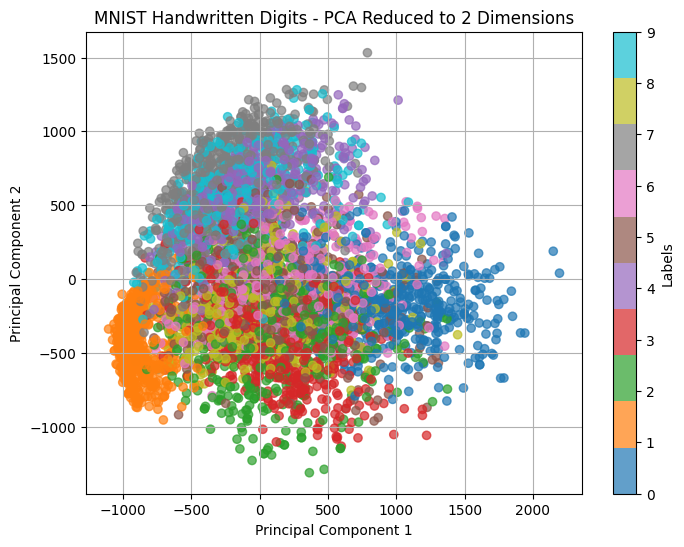

In [145]:
images, labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True) 
 
print(images.shape, labels.shape) 
pca = PCA(n_components=2)
images_reduced = pca.fit_transform(images)

# Biểu diễn dữ liệu trên mặt phẳng
plt.figure(figsize=(8, 6))
plt.scatter(images_reduced[:, 0], images_reduced[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.colorbar(label='Labels')
plt.title('MNIST Handwritten Digits - PCA Reduced to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [146]:
 #Convert matrix to image 
def get_image(image): 
    return image.reshape(28, 28) 
 
# These methods are from Vi du 1 
def convert_labels(y, C): 
    from scipy import sparse  
    Y = sparse.coo_matrix((np.ones_like(y),  
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray() 
    return Y  
 
def softmax(Z): 
    e_Z = np.exp(Z) 
    A = e_Z / e_Z.sum(axis = 0) 
    return A 
 
def softmax_stable(Z): 
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True)) 
    A = e_Z / e_Z.sum(axis = 0) 
    return A 
 
def pred(W, X): 
    A = softmax_stable(W.T.dot(X)) 
    return np.argmax(A, axis = 0)

In [147]:
def _softmax_regression(X, Y, theta, lambda_=0.5, 
                       iterations=20, learning_rate=1e-5, batch_size=200): 
    from sklearn.metrics import log_loss 
     
    losses = [] 
    _theta = theta 
    d, N = X.shape 
     
    for iter_ in range(iterations): 
        shuffle_index = np.random.permutation(N) 
        for i in shuffle_index: 
            xi = X[:, i].reshape(d, 1) 
            yi = Y[:, i].reshape(10, 1) 
            ai = softmax_stable(np.dot(_theta.T, xi)) 
            _theta += learning_rate * xi.dot((yi - ai).T) 
            if (iter_ * N + i) % batch_size == 0: 
                Y_hat = np.dot(_theta.T, X) 
                losses.append(log_loss(Y, Y_hat)) 
                 
        Y_hat = np.dot(_theta.T, X) 
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}") 
                 
    return _theta, losses 

Áp dụng phương pháp phân loại nhiều lớp Multinomial Logistic Regression (tham khảo bài 
trước) để phân loại để phân loại tập dữ liệu đã chọn trong ý 1), tỷ lệ train:validation là 0.7:0.3. 
Lưu lại các độ đo tính chính xác và thời gian chạy của mô hình trong thực nghiệm này. 

(785, 3500)
(10, 3500)


<Figure size 640x480 with 0 Axes>

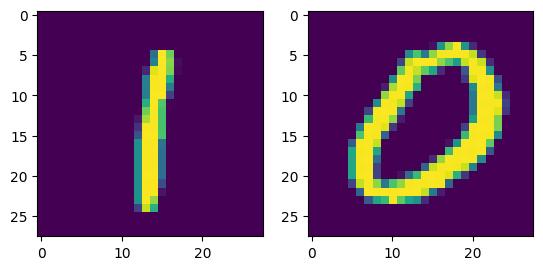

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Tách tập dữ liệu thành tập huấn luyện và tập validation
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)

X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T),  
         axis = 0) 
Y_train = convert_labels(train_labels, 10) 
print(X_train.shape) 
print(Y_train.shape) 
train_image = np.asarray(get_image(train_images[index])).squeeze() 
test_image = np.asarray(get_image(test_images[index])).squeeze() 
 
plt.figure() 
 
#subplot(r,c) provide the no. of rows and columns 
f, axarr = plt.subplots(1, 2)  
 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically 
axarr[0].imshow(train_image) 
axarr[1].imshow(test_image) 
plt.show() 

In [149]:
theta = np.zeros((X_train.shape[0], 10)) 
opt_theta, losses = _softmax_regression(X_train, Y_train, theta) 
print('training success: ', opt_theta.shape, len(losses)) 

c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 0 - cost 0.7628169360000588


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 1 - cost 0.7552872707286099


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 2 - cost 0.7467435939073114


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 3 - cost 0.7402116875521089


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 4 - cost 0.7378434508016911


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 5 - cost 0.7383934082850717


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 6 - cost 0.7406119443278415


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 7 - cost 0.7378434054228254


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 8 - cost 0.7364894547637072


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 9 - cost 0.7398246050657665


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 10 - cost 0.7353752025477082


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 11 - cost 0.7372265460334797


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 12 - cost 0.7378626752306308


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 13 - cost 0.7377698910120972


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 14 - cost 0.7379151051223513


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 15 - cost 0.7372360303053973


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 16 - cost 0.7368703405019034


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 17 - cost 0.7369559980708104


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 18 - cost 0.7365926542250786


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 19 - cost 0.7374404757620516
training success:  (785, 10) 350


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

In [150]:
from sklearn.metrics import accuracy_score 
print('accuracy training data: ', accuracy_score(train_labels, pred(opt_theta, X_train))) 
# test_images, test_labels = get_mnist_data( 
#     test_images_path, test_labels_path, 1000, _is=False, shuffle=False) 
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T),axis = 0) 
print(X_test.shape) 
print('accuracy testing data: ', accuracy_score(test_labels,pred(opt_theta, X_test))) 

accuracy training data:  0.9594285714285714
(785, 1500)
accuracy testing data:  0.852


3. Tiến hành thực nghiệm lại với cùng tập dữ liệu nói trên và so sánh kết quả (độ chính xác và thời 
gian) chạy mô hình phân loại trong hai trường hợp: 
a) Sử dụng toàn dữ liệu nguyên bản (giữ nguyên 28x28 = 784 chiều), sau đó giảm số chiều 
xuống còn 100 chiều, chia thành 2 tập train:validation theo tỷ lệ là 0.7:0.3. Sau đó thực hiện 
mô hình Multinomial Logistic Regression để phân loại. 

In [151]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Giảm số chiều của dữ liệu xuống còn 100 chiều
pca = PCA(n_components=100)
images_reduced = pca.fit_transform(images)

# Tách tập dữ liệu thành tập huấn luyện và tập validation
train_images, test_images, train_labels, test_labels = train_test_split(images_reduced, labels, test_size=0.3, random_state=42)

X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T),  
         axis = 0) 
Y_train = convert_labels(train_labels, 10) 
print(X_train.shape) 
print(Y_train.shape) 

(101, 3500)
(10, 3500)


In [152]:
theta = np.zeros((X_train.shape[0], 10)) 
start_time = time.time()
opt_theta, losses = _softmax_regression(X_train, Y_train, theta) 
training_time = time.time() - start_time
print('training success: ', opt_theta.shape, len(losses)) 

c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 0 - cost 0.7726932780729034


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 1 - cost 0.7580833248086047


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 2 - cost 0.7555034800516414


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 3 - cost 0.7567518207718705


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 4 - cost 0.7488785973814392


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 5 - cost 0.7522726978820692


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 6 - cost 0.7482591200741611


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 7 - cost 0.7502379858877836


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 8 - cost 0.7497994716642842


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 9 - cost 0.7531196310802336


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 10 - cost 0.7464114301879046


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 11 - cost 0.7481935811647784


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 12 - cost 0.748577416576357


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 13 - cost 0.7524241750100651


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 14 - cost 0.7479119610406685


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 15 - cost 0.7458346055839467


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 16 - cost 0.7453671727726032


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 17 - cost 0.743685273688359


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 18 - cost 0.7492099304446466


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 19 - cost 0.7445043170350597
training success:  (101, 10) 350


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

In [153]:
from sklearn.metrics import accuracy_score 
print('accuracy training data: ', accuracy_score(train_labels, pred(opt_theta, X_train))) 
# test_images, test_labels = get_mnist_data( 
#     test_images_path, test_labels_path, 1000, _is=False, shuffle=False) 
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T),axis = 0) 
print(X_test.shape) 
print('accuracy testing data: ', accuracy_score(test_labels,pred(opt_theta, X_test))) 
print("Training time: ", training_time)

accuracy training data:  0.9122857142857143
(101, 1500)
accuracy testing data:  0.87
Training time:  7.215455055236816


Chia tập 5000 ảnh nói trên thành 2 tập train:validation theo tỷ lệ là 0.7:0.3. Thực hiện giảm 
số chiều của mỗi tập về còn 100 chiều một cách độc lập. Sau đó thực hiện lại bước phân 
loại với mô hình Multinomial Logistic Regression. 

In [154]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Giảm số chiều của dữ liệu xuống còn 100 chiều
pca = PCA(n_components=100)

# Tách tập dữ liệu thành tập huấn luyện và tập validation
train_images, test_images, train_labels, test_labels = train_test_split(images_reduced, labels, test_size=0.3, random_state=42)
train_images_reduced = pca.fit_transform(train_images)
test_images_reduced = pca.transform(test_images)

X_train = np.concatenate((np.ones((1, train_images_reduced.shape[0])), train_images_reduced.T),  
         axis = 0) 
Y_train = convert_labels(train_labels, 10) 
print(X_train.shape) 
print(Y_train.shape) 

(101, 3500)
(10, 3500)


In [155]:
theta = np.zeros((X_train.shape[0], 10)) 
start_time = time.time()
opt_theta, losses = _softmax_regression(X_train, Y_train, theta) 
training_time = time.time() - start_time
print('training success: ', opt_theta.shape, len(losses)) 

c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 0 - cost 0.771179557247098


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 1 - cost 0.7664462092940586


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 2 - cost 0.7468409021590215


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 3 - cost 0.751009010564759


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 4 - cost 0.7580106974474973


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 5 - cost 0.747323011078533


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 6 - cost 0.7511610844449381


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 7 - cost 0.7497277626605057


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 8 - cost 0.747629111791743


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 9 - cost 0.7509158549961578


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 10 - cost 0.7501151843170455


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 11 - cost 0.751137169048196


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 12 - cost 0.7455256886534023


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 13 - cost 0.745297704418678


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 14 - cost 0.7456663453064744


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 15 - cost 0.7528206829455326


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 16 - cost 0.7463687067168366


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 17 - cost 0.7486930583401175


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 18 - cost 0.7480994089408367


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

epoch 19 - cost 0.7499081164139167
training success:  (101, 10) 350


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\

In [156]:
from sklearn.metrics import accuracy_score 
print('accuracy training data: ', accuracy_score(train_labels, pred(opt_theta, X_train))) 
# test_images, test_labels = get_mnist_data( 
#     test_images_path, test_labels_path, 1000, _is=False, shuffle=False) 
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T),axis = 0) 
print(X_test.shape) 
print('accuracy testing data: ', accuracy_score(test_labels,pred(opt_theta, X_test))) 
print('Trainning time: ', training_time)

accuracy training data:  0.9131428571428571
(101, 1500)
accuracy testing data:  0.6113333333333333
Trainning time:  7.291094064712524


Nhận xét:
Phương pháp 1 có thể cho kết quả tốt hơn vì dữ liệu được giảm chiều trên toàn bộ tập dữ liệu, giúp mô hình học được các đặc trưng chung của dữ liệu.
Phương pháp 2 có thể dẫn đến việc mô hình không học được các đặc trưng chung của toàn bộ dữ liệu, do dữ liệu được giảm chiều độc lập trên từng tập.
Tuy nhiên, phương pháp 2 có thể nhanh hơn về mặt thời gian tính toán vì chỉ áp dụng PCA trên một phần nhỏ của dữ liệu.

Hãy thực hiện lại bài toán phân loại dữ liệu ở ý 2) và 3) nhưng sử dụng mô hình Naïve Bayes 
phù hợp. So sánh kết quả để chỉ ra độ chính xác của mô hình nào thay đổi nhiều hơn. Giải thích. 

In [162]:
from sklearn.decomposition import PCA
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time
# Giảm số chiều của dữ liệu xuống còn 100 chiều
pca = PCA(n_components=100)
images_reduced = pca.fit_transform(images)

# Tách tập dữ liệu thành tập huấn luyện và tập validation
train_images, test_images, train_labels, test_labels = train_test_split(images_reduced, labels, test_size=0.3, random_state=42)

print(train_images.shape) 
print(train_labels.shape) 
# Huấn luyện mô hình Naïve Bayes
model = GaussianNB()
start_time = time.time()
model.fit(train_images, train_labels)
training_time = time.time() - start_time

# Đánh giá mô hình trên tập validation
y_pred = model.predict(test_images)
accuracy = accuracy_score(test_labels, y_pred)
print("Độ chính xác của mô hình Naïve Bayes trên tập validation:", accuracy)
print("Training time: ", training_time)

(3500, 100)
(3500,)
Độ chính xác của mô hình Naïve Bayes trên tập validation: 0.8673333333333333
Training time:  0.015699386596679688


In [165]:
from sklearn.decomposition import PCA
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time
# Giảm số chiều của dữ liệu xuống còn 100 chiều
pca = PCA(n_components=100)

# Tách tập dữ liệu thành tập huấn luyện và tập validation
train_images, test_images, train_labels, test_labels = train_test_split(images_reduced, labels, test_size=0.3, random_state=42)
train_images_reduced = pca.fit_transform(train_images)
test_images_reduced = pca.fit_transform(test_images)
print(train_images_reduced.shape) 
print(train_labels.shape) 
# Huấn luyện mô hình Naïve Bayes
model = GaussianNB()
start_time = time.time()
model.fit(train_images_reduced, train_labels)
training_time = time.time() - start_time

# Đánh giá mô hình trên tập validation
y_pred = model.predict(test_images_reduced)
accuracy = accuracy_score(test_labels, y_pred)
print("Độ chính xác của mô hình Naïve Bayes trên tập validation:", accuracy)
print("Training time: ", training_time)

(3500, 100)
(3500,)
Độ chính xác của mô hình Naïve Bayes trên tập validation: 0.15333333333333332
Training time:  0.015839815139770508


#### Đối với cả hai phương pháp giảm số chiều, mô hình Multinomial Logistic Regression đạt được độ chính xác cao hơn so với mô hình Naïve Bayes.
#### Thời gian chạy của mô hình Navie Bayes nhanh hơn rất nhiều so với Multinomial Logistic Regression, đặc biệt là khi áp dụng giảm số chiều.
#### Trong trường hợp này, mặc dù Multinomial Logistic Regression mất nhiều thời gian hơn để huấn luyện, nhưng nó đạt được độ chính xác cao hơn so với Naïve Bayes.
#### Điều này có thể ngụ ý rằng dữ liệu của bài toán này có sự phức tạp và tương tác giữa các đặc trưng, điều mà Multinomial Logistic Regression có khả năng học tốt hơn so với Naïve Bayes